In [ ]:
# Install Necessary Libraries
!pip install kagglehub --quiet
!pip install pandas matplotlib seaborn wordcloud textblob plotly --quiet

In [ ]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
import plotly.express as px

In [ ]:
# Download Dataset Using kagglehub
path = kagglehub.dataset_download("utshabkumarghosh/android-app-market-on-google-play")
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/utshabkumarghosh/android-app-market-on-google-play/versions/1


In [ ]:
import os
print("Files in dataset folder:", os.listdir(path))

Files in dataset folder: ['datasets']


In [ ]:
# Load the csv files
apps_file = os.path.join(path, "datasets", "apps.csv")
reviews_file = os.path.join(path, "datasets", "user_reviews.csv")
print("CSV loaded successfully!")

CSV loaded successfully!


In [ ]:
# Load the apps and reviews datasets
try:
    apps_data = pd.read_csv(apps_file)
    reviews_data = pd.read_csv(reviews_file)
    print("Datasets loaded successfully!")
    print(f"Apps Dataset Shape: {apps_data.shape}")
    print(f"Reviews Dataset Shape: {reviews_data.shape}")
except FileNotFoundError as e:
    print(f"Error: {e}")
    print("Ensure the file paths are correct.")

Datasets loaded successfully!
Apps Dataset Shape: (9659, 14)
Reviews Dataset Shape: (64295, 5)


In [ ]:
# Display the first few rows of the dataset
print(apps_data.head())
print(reviews_data.head())

   Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                                Coloring book moana   
2           2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3           3                              Sketch - Draw & Paint   
4           4              Pixel Draw - Number Art Coloring Book   

         Category  Rating  Reviews  Size     Installs  Type Price  \
0  ART_AND_DESIGN     4.1      159  19.0      10,000+  Free     0   
1  ART_AND_DESIGN     3.9      967  14.0     500,000+  Free     0   
2  ART_AND_DESIGN     4.7    87510   8.7   5,000,000+  Free     0   
3  ART_AND_DESIGN     4.5   215644  25.0  50,000,000+  Free     0   
4  ART_AND_DESIGN     4.3      967   2.8     100,000+  Free     0   

  Content Rating                     Genres      Last Updated  \
0       Everyone               Art & Design   January 7, 2018   
1       Everyone  Art & Design;Pretend Play  J

In [ ]:
# Data Cleaning
apps_data.columns = apps_data.columns.str.strip().str.replace(' ', '_')
reviews_data.columns = reviews_data.columns.str.strip().str.replace(' ', '_')

In [ ]:
# Check for missing values
#

In [ ]:
# Fill missing values with appropriate strategy (e.g., mean, mode, median)
apps_data['Rating'].fillna(apps_data['Rating'].median(), inplace=True)
apps_data['Type'].fillna(apps_data['Type'].mode()[0], inplace=True)
apps_data['Current_Ver'].fillna('Varies with device', inplace=True)
apps_data['Android_Ver'].fillna('Varies with device', inplace=True)

 # Fill missing reviews with 'No review'
reviews_data['Translated_Review'].fillna('No review', inplace=True)

<ipython-input-34-addc66f4f1a8>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-34-addc66f4f1a8>:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[

In [ ]:
# Standardize app sizes (KB/MB -> MB)
def convert_size(size):
    if isinstance(size, str):
        if 'M' in size:
            return float(size.replace('M', ''))
        elif 'k' in size:
            return float(size.replace('k', '')) / 1024
    return np.nan

apps_data['Size'] = apps_data['Size'].apply(convert_size)


In [ ]:
#convert price and reviews in to numerical values
apps_data['Price'] = apps_data['Price'].str.replace('$', '').astype(float, errors='ignore')
apps_data['Reviews'] = apps_data['Reviews'].astype(int, errors='ignore')

In [ ]:
# Step 3: Merge Datasets
merged_data = pd.merge(apps_data, reviews_data, on='App', how='inner')
print(f"Merged Dataset Shape: {merged_data.shape}")

Merged Dataset Shape: (61556, 18)


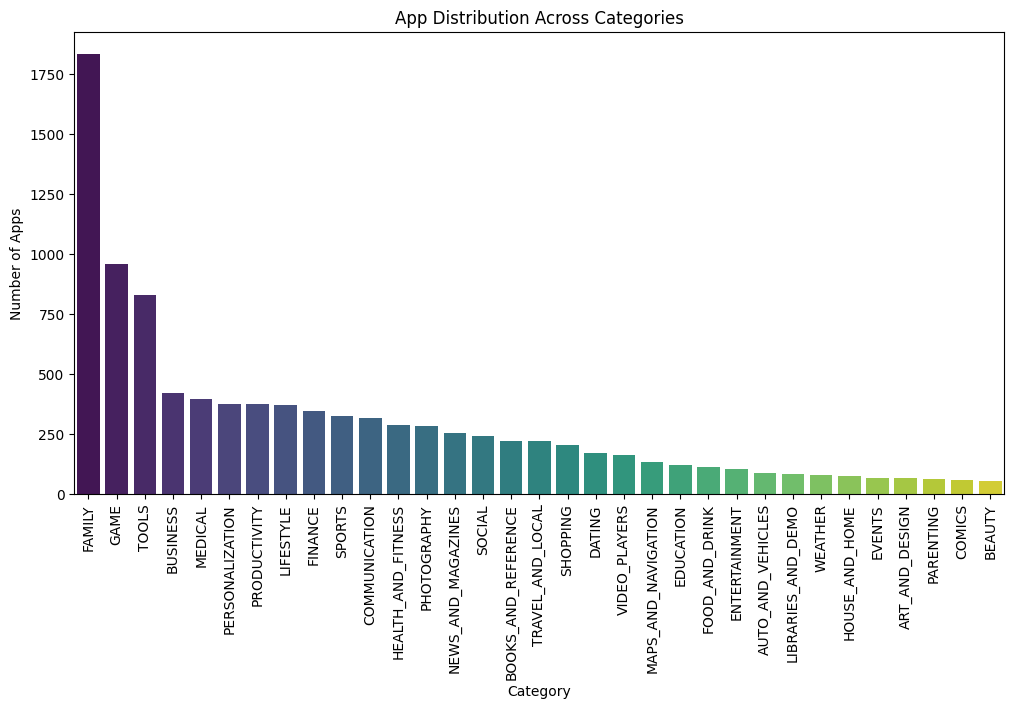

In [ ]:
# Step 4: Data Analysis and Visualization
# 4.1: App Distribution Across Categories
category_distribution = apps_data['Category'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=category_distribution.index,
            y=category_distribution.values,
            hue=category_distribution.index,
            palette="viridis",
            legend=False)
plt.title("App Distribution Across Categories")
plt.xlabel("Category")
plt.ylabel("Number of Apps")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating', y='Reviews', data=apps_data, hue='Type', size='Installs', sizes=(20, 200))
plt.title('App Ratings vs. Reviews')
plt.xlabel('Rating')
plt.ylabel('Reviews')
plt.legend(title='Type')
plt.show()

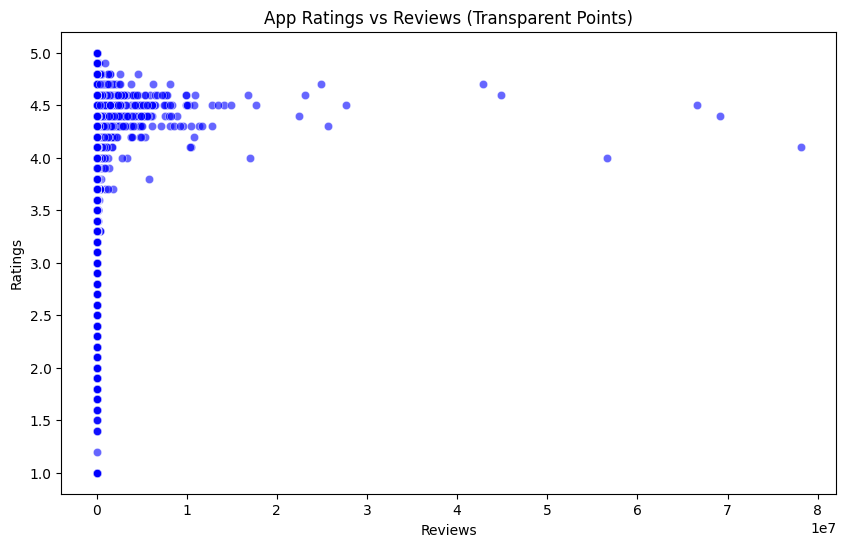

In [ ]:
# 4.1: App Ratings vs Reviews
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Reviews', y='Rating', data=apps_data, color='blue', alpha=0.6)
plt.title("App Ratings vs Reviews (Transparent Points)")
plt.xlabel("Reviews")
plt.ylabel("Ratings")
plt.show()

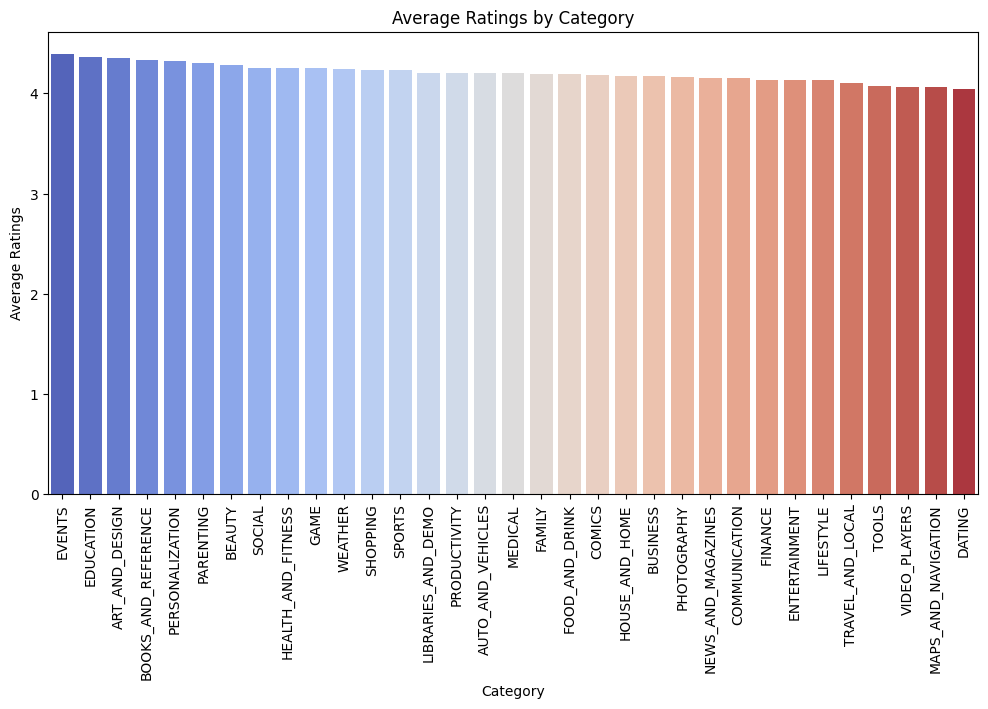

In [ ]:
# 4.2: Average Ratings by Category
avg_ratings = apps_data.groupby('Category')['Rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(
    x=avg_ratings.index,
    y=avg_ratings.values,
    hue=category_distribution.index,
    palette="coolwarm",
    legend=False)
plt.title("Average Ratings by Category")
plt.xlabel("Category")
plt.ylabel("Average Ratings")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# 4.3: Sentiment Analysis with Polarity
def analyze_sentiment(review):
    if pd.isnull(review):
        return "Neutral", 0  # Neutral sentiment and 0 polarity
    analysis = TextBlob(review)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return "Positive", polarity
    elif polarity < 0:
        return "Negative", polarity
    else:
        return "Neutral", polarity

# Apply sentiment analysis and store polarity score
reviews_data[['Sentiment', 'Polarity']] = reviews_data['Translated_Review'].apply(lambda review: pd.Series(analyze_sentiment(review)))


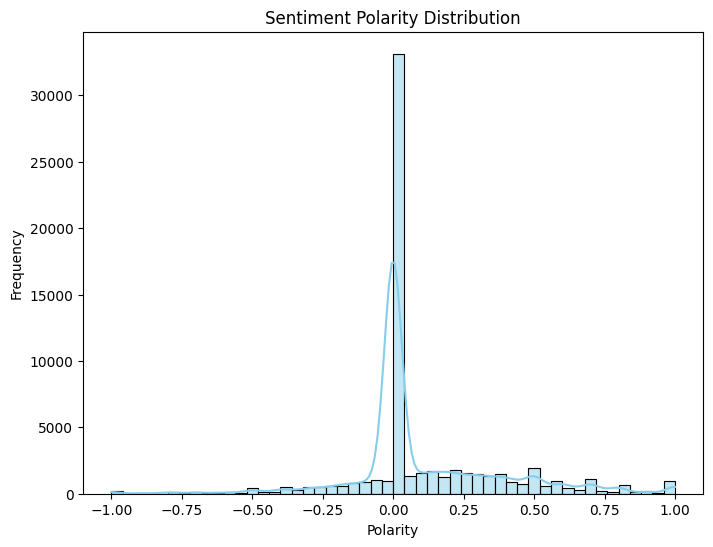

In [ ]:
# Polarity Distribution Plot
plt.figure(figsize=(8, 6))
sns.histplot(reviews_data['Polarity'], bins=50, kde=True, color='skyblue')
plt.title("Sentiment Polarity Distribution")
plt.xlabel("Polarity")
plt.ylabel("Frequency")
plt.show()

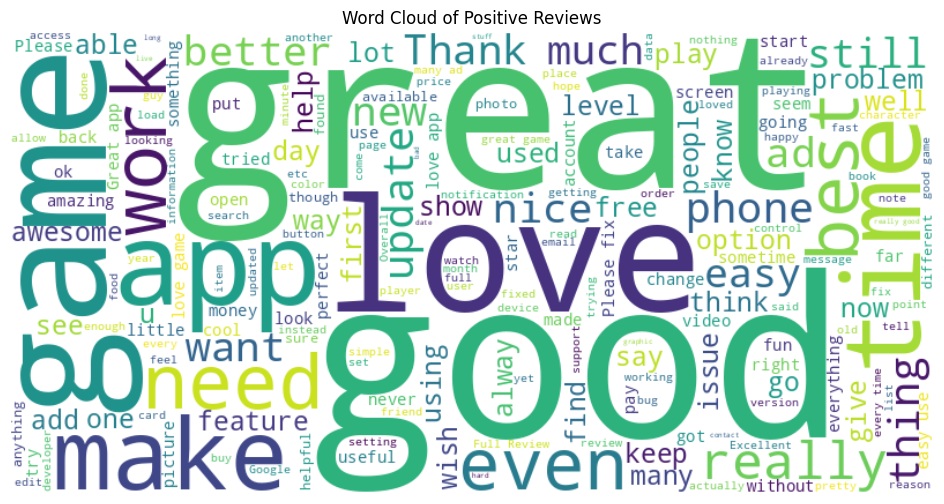

In [ ]:
# Word Cloud for Positive Reviews
positive_reviews = " ".join(review for review in reviews_data[reviews_data['Sentiment'] == "Positive"]['Translated_Review'])
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Positive Reviews")
plt.show()

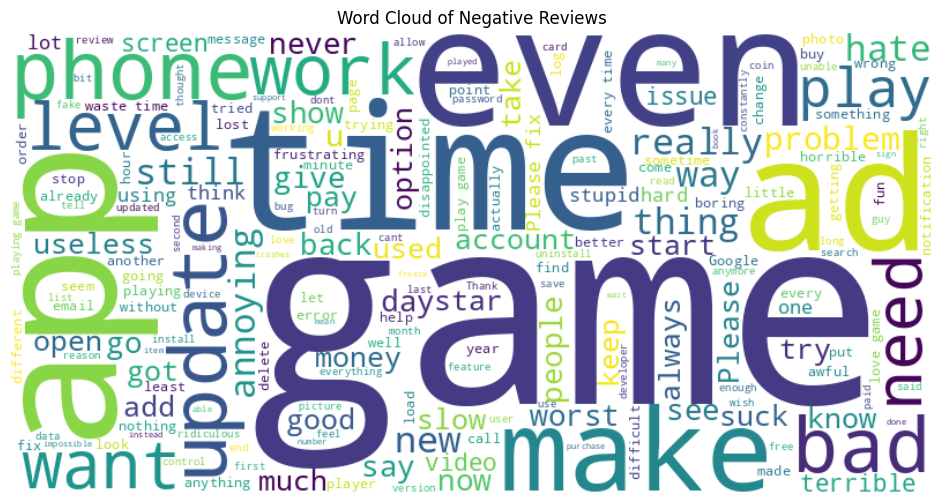

In [ ]:
# Word Cloud for Negative Reviews
negative_reviews = " ".join(review for review in reviews_data[reviews_data['Sentiment'] == "Negative"]['Translated_Review'])
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Negative Reviews")
plt.show()

In [ ]:
# Step 5: Interactive Visualization with Plotly
# App Categories and Ratings
fig = px.bar(
    data_frame=apps_data,
    x='Category',
    y='Rating',
    color='Category',
    title="Category-wise Ratings (Interactive)",
    color_continuous_scale='Viridis')

fig.update_layout(
    plot_bgcolor='white',  # Set plot background to white
    paper_bgcolor='white',  # Set paper background to white
    title_font=dict(size=20, color='black'),  # Title font color and size
    xaxis_title='Category',
    yaxis_title='Rating',
    xaxis=dict(tickangle=45),  # Rotate x-axis labels for better readability
    showlegend=False,  # Hide legend if it's cluttering the plot
    width=800,  # Set custom width
    height=600  # Set custom height
)
fig.show()

In [ ]:
# Sentiment Analysis Pie Chart
fig = px.pie(data_frame=reviews_data, names='Sentiment', title="Sentiment Distribution in User Reviews")
fig.show()


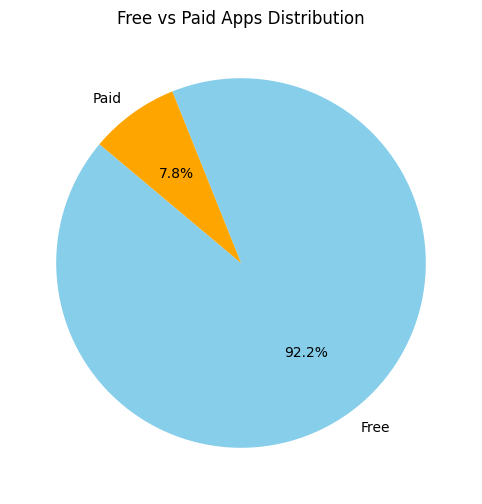

In [ ]:
# Step 6: Price Distribution of Free vs Paid Apps
free_paid = apps_data['Type'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(free_paid, labels=free_paid.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange'])
plt.title("Free vs Paid Apps Distribution")
plt.show()
